In [84]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings, matplotlib.ticker as mticks
warnings.filterwarnings("ignore")

X_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
X_train = X_train.drop('Loan_ID', axis = 1)
X_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
y_train = X_train['Loan_Status']



Plotting Univariate Distributions of the Data

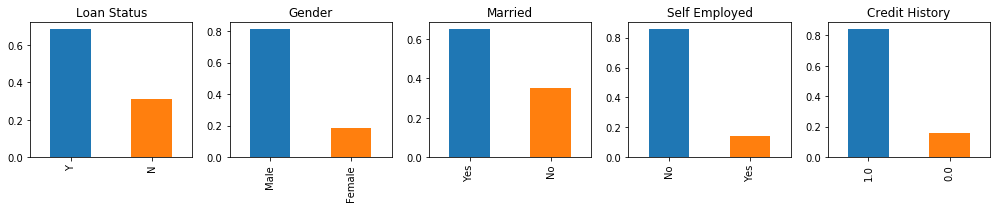

In [17]:
#Categorical
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = [14, 3])
plt.subplot(151)
X_train['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Loan Status')
plt.subplot(152)
X_train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.subplot(153)
X_train['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(154)
X_train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(155)
X_train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')
plt.tight_layout()

Univariate Categorical Observations:
-About 60% of loans are approved
-Nearly 80% of applicants are Male, Self-Employed, and have a Credit History (not necessilarly inclusive of all 3)
-About 60% of applicants are married


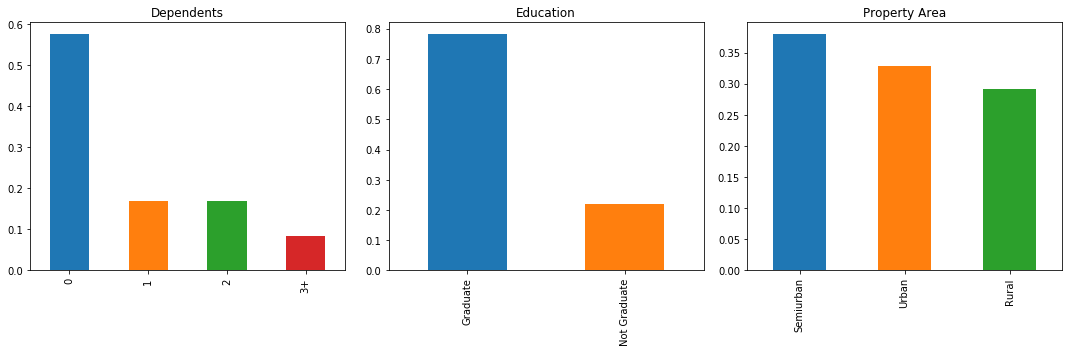

In [28]:
#Nominal
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = [15,5])
plt.subplot(131)
X_train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(132)
X_train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
X_train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property Area')
plt.tight_layout()

Univariate Nominal Observations: 
-Majority of applicants don't have anyone dependent on them
-About 80% are college graduates
-Property area is nearly uniformally distributed between SemiUrban, Urban, and Rural

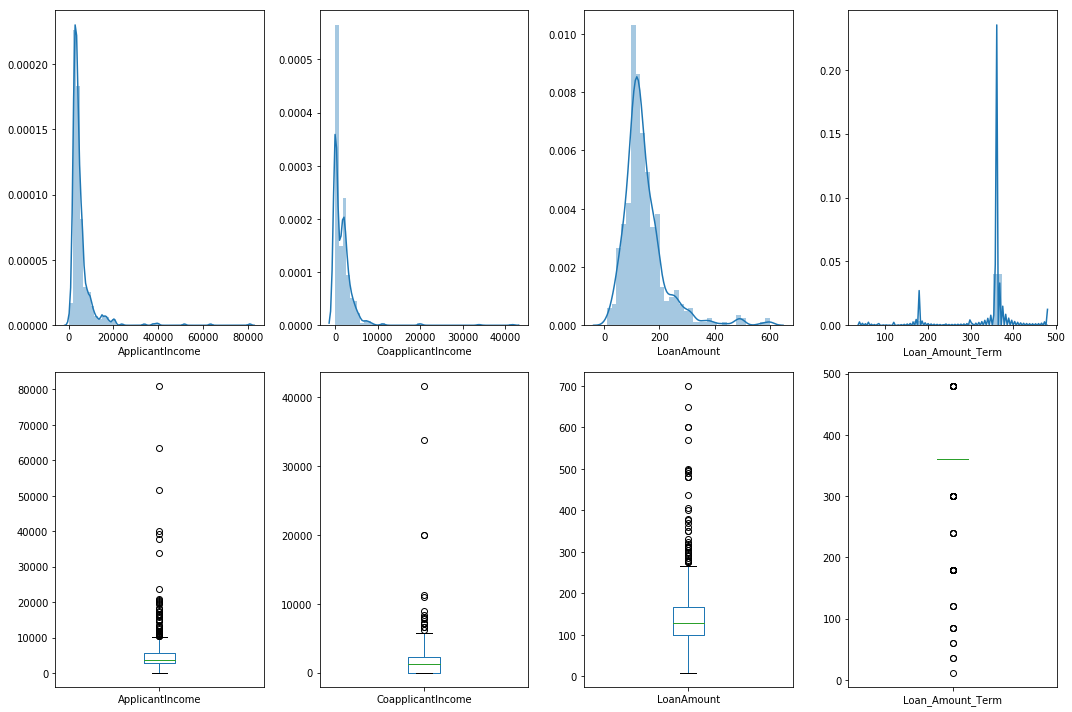

In [41]:
#Numerical
f2, ax2 = plt.subplots(nrows = 2, ncols = 4, figsize = [15,10])

plt.subplot(241)
sns.distplot(X_train['ApplicantIncome'])
plt.subplot(242)
sns.distplot(X_train['CoapplicantIncome'])
plt.subplot(243)
temp = X_train.dropna()
sns.distplot(temp['LoanAmount'])
plt.subplot(244)
sns.distplot(temp['Loan_Amount_Term'])
plt.subplot(245)
X_train['ApplicantIncome'].plot.box()
plt.subplot(246)
X_train['CoapplicantIncome'].plot.box()
plt.subplot(247)
X_train['LoanAmount'].plot.box()
plt.subplot(248)
X_train['Loan_Amount_Term'].plot.box()
plt.tight_layout()

Univariate Numerical Observations:
-Every single distribution is skewed right and non-normal, with Loan Amount being the closest to a normal distribution
-Applicants tend to have income between $0-$10000, while Coapplicants are in the same range but skewed further right
-Loans tend to be a year in length, with the amount generally ranging between $0-$200

Bivariate Distributions and Analyses of Target and Feature

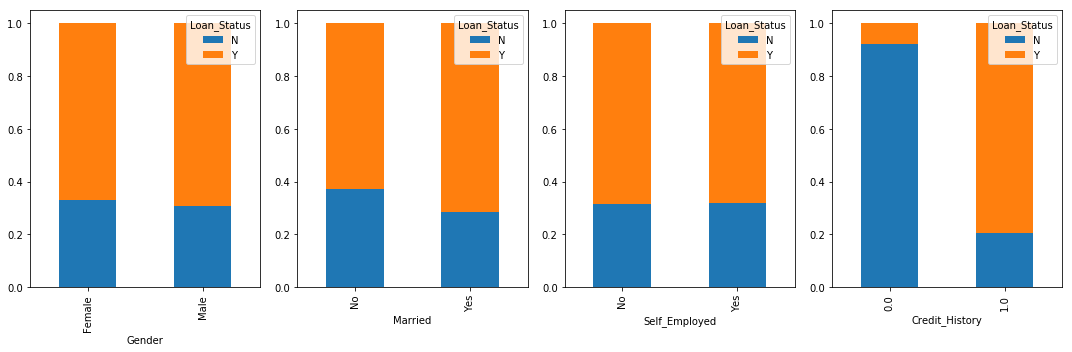

In [69]:
#Categorical (Gender, Married, Self_Employed, Credit_History, Loan_Status)
f3, ax3 = plt.subplots(nrows = 1, ncols = 4, figsize = [15,5])
ax4 = plt.subplot(141)
Gender = pd.crosstab(X_train['Gender'], X_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax =ax4)
ax5 = plt.subplot(142)
Married = pd.crosstab(X_train['Married'], X_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax =ax5)
ax6 = plt.subplot(143)
Self_Employed = pd.crosstab(X_train['Self_Employed'], X_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax =ax6)
ax7 = plt.subplot(144)
Credit_History = pd.crosstab(X_train['Credit_History'], X_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax =ax7)
plt.tight_layout()

Observations:
-Between features Gender, Married, and Self_Employed there is a general trend of 65% approved loans for the categories female, no, and no respectively
-Applicants with no credit history get denied for a loan over 90% of the time, where as those with a history get approved 80% of the time    

In [ ]:
#Nominal (Dependents, Education, Property_Area)
fit, axes = plt.subplots(nrows = 1, ncols = 3, figsize = [16,5])
ax1 = plt.subplot(131)
Dependents = pd.crosstab(X_train['Dependents'], X_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot.bar(stacked = True, ax = ax1)
ax2 = plt.subplot(132)
Education = pd.crosstab(X_train['Education'], X_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax=ax2)
ax3 = plt.subplot(133)
Property_Area = pd.crosstab(X_train['Property_Area'], X_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot.bar(stacked = True, ax=ax3)
plt.tight_layout()

Nominal Observations:
-Slightly favors 2 dependents, Graduates and SemiUrban for Dependents, Education, and Property Area respectively

Let's take a closer look at the relationship between how much is requested for a loan, how much the applicant makes, and whether or not the applicant was approved.

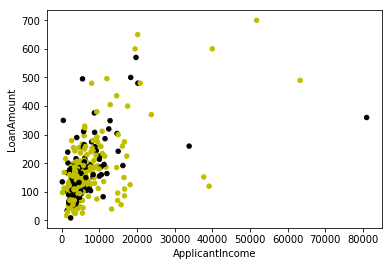

In [98]:
colors = np.where(X_train['Loan_Status']=="Y",'y','k')
X_train.plot.scatter('ApplicantIncome','LoanAmount', c = colors)


A lot of the applicants make between $0 and $10,000, so let's take a closer look at specifically these values and ignore our outliers. 

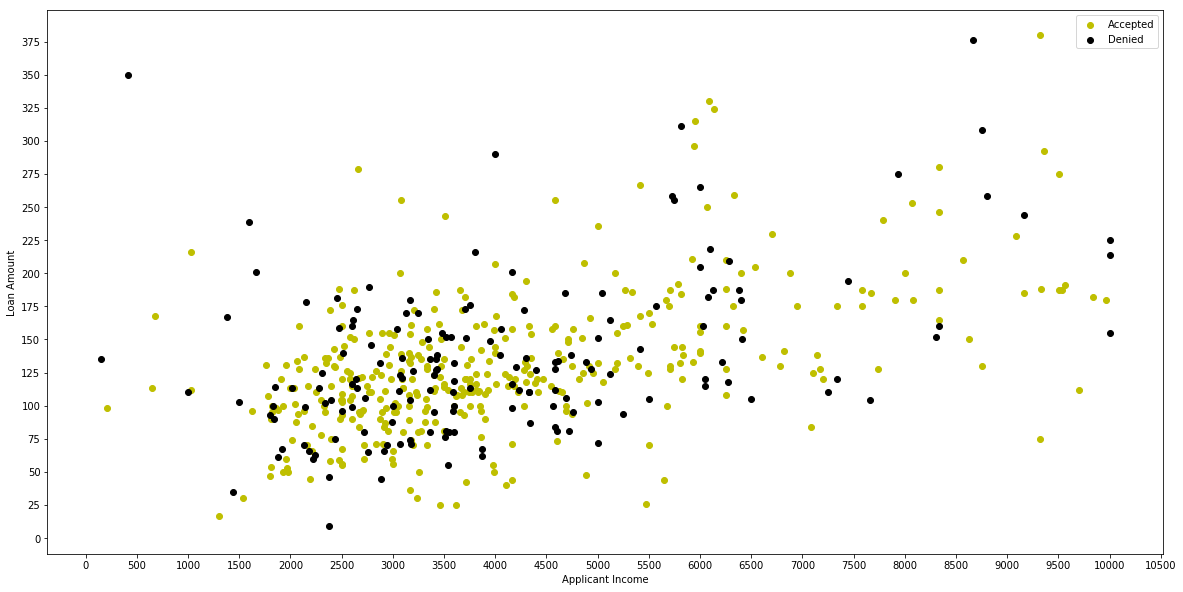

In [123]:
temp = X_train.loc[(X_train['ApplicantIncome'] <= 10000) & (X_train['LoanAmount'] <= 400)]
accepted = temp.loc[temp["Loan_Status"] == "Y"]
denied = temp.loc[temp["Loan_Status"] == "N"]
accepted_x,accepted_y = accepted["ApplicantIncome"].tolist(), accepted["LoanAmount"].tolist()
denied_x, denied_y = denied["ApplicantIncome"].tolist(), denied["LoanAmount"].tolist()

    
fig, ax = plt.subplots(figsize = [20,10])
ax.xaxis.set_major_locator(mticks.MultipleLocator(500))
ax.yaxis.set_major_locator(mticks.MultipleLocator(25))
plt.scatter(accepted_x, accepted_y, c = "y", label = "Accepted")
plt.scatter(denied_x, denied_y, c="k", label = "Denied")
plt.ylabel("Loan Amount")
plt.xlabel("Applicant Income")
plt.legend()


From this, it is still hard to see a general trend in the data with respect to these two variables. Let's compute the covariance matrix to see the covariance between each feature. Note that we can only compute the covariance between numerical features, i.e. ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.

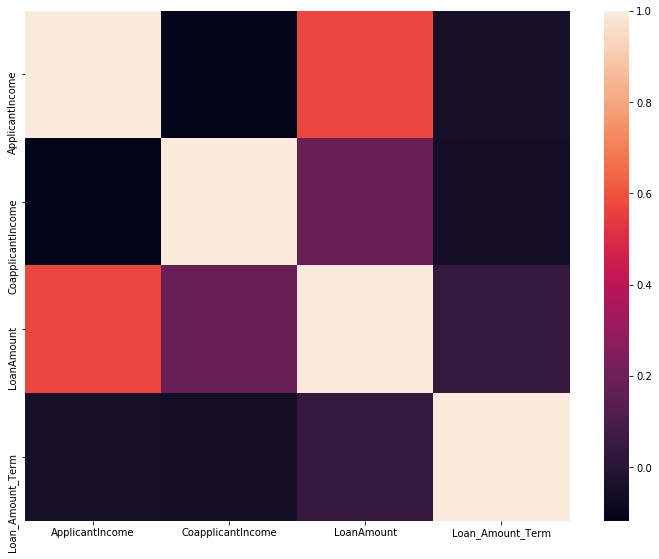

In [136]:
#Covariance Matrix
X = X_train.drop(['Loan_Status', "Credit_History"] , axis = 1)
corr = X.corr()
fig, ax =plt.subplots(figsize = [10,8])
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.tight_layout()

Observations: 
-Very low correlation with Loan Amount Term for both Coapplicant Income and Applicant Income, which makes sense. Loan Amount Term should be independent of these two features.
-Mild correlation between Loan Amount and Applicant Income. We can see this in our graph directly above, as there is some positive correlation between the two variables. Similarly for Loan Amount and Coapplicant Income, which again makes sense as the amount requested of a loan should be more dependent on the person requesting the loan versus the cosigner.

The final step before we can begin running models is to clean the data. For datapoints with missing values, we will replace missing categorical features with the mode of that feature, and missing numerical features with the mean of that feature. 

In [85]:
#Missing Data
X_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
X_train["Gender"].fillna(X_train["Gender"].mode()[0], inplace=True)
X_train["Married"].fillna(X_train["Married"].mode()[0], inplace=True)
X_train["Dependents"].fillna(X_train["Dependents"].mode()[0], inplace=True)
X_train["Self_Employed"].fillna(X_train["Self_Employed"].mode()[0], inplace=True)
X_train["LoanAmount"].fillna(X_train["LoanAmount"].mean(), inplace=True)
X_train["Loan_Amount_Term"].fillna(X_train["Loan_Amount_Term"].mean(), inplace=True)
X_train["Credit_History"].fillna(X_train["Credit_History"].mode()[0], inplace=True)
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, we can begin running classifiers on our data. We will break this down into two sections, performance of each model without feature engineering and performance of the models with feature engineering. We can then compare the performance of each model with and without feature engineering and make inferences regarding the differences among data sets as well as difference among models. 
The Classifiers we will use are:
Logistic Regression 
Decision Tree
Support Vector Machine
Random Forest
XGBoost

In [126]:
"""
Logisitic Regression

We perform grid search in order to final the optimal combination of hyperparameters.
I should scale the data to be between 0-1 here sklearnstandardscale
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
X_trainV1 = X_train.drop("Loan_Status", axis = 1)
X_trainV1 = pd.get_dummies(X_trainV1)
C_vals = [.0001, .05, .1, .25, .5, 1, 1.5, 3]
norms = ["11", "l2"]
scores = {}
mean_test_Accuracy = count = 0
for k in range(2,8):
    for C_val in C_vals:
        for norm in norms:
            skf = StratifiedKFold(n_splits = k)
            for train_index, test_index in skf.split(X_trainV1, y_train):
                X_train_temp, X_test_temp = X_trainV1.loc[train_index], X_trainV1.loc[test_index]
                y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
                y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
                clf = LogisticRegression(random_state=1, C=C_val)
                clf.fit(X_train_temp, y_train_temp)
                train_Accuracy = clf.score(X_train_temp, y_train_temp)
                test_Accuracy = clf.score(X_test_temp, y_test_temp)
                pairing = "{}, {}, {}".format(k, C_val, norm)
                scores[pairing] = [train_Accuracy, test_Accuracy]
                count +=1
                mean_test_Accuracy += test_Accuracy
best_train_params = max(scores.keys(), key= lambda k: scores[k][0])
best_test_params = max(scores.keys(), key= lambda k: scores[k][1])
k1, C1, p1 = best_train_params.split(", ")
k2, C2, p2 = best_test_params.split(", ")
logit_stats = [mean_test_Accuracy / count, scores[best_test_params][0], scores[best_test_params][1]]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("minimum training error parameters:  k = {}, C = {}, penalty = {}".format(k1, C1, p1))
print("training accuracy: " + str(scores[best_train_params][0]))
print("testing accuracy: " + str(scores[best_train_params][1]))
print("minimum test error parameters:  k = {}, C = {}, penalty = {}".format(k2, C2, p2))
print("training accuracy: " + str(scores[best_test_params][0]))
print("testing accuracy: " + str(scores[best_test_params][1]))

Mean test Accuracy: 0.7871081892657796
minimum training error parameters:  k = 5, C = 3, penalty = 11
training accuracy: 0.8130081300813008
testing accuracy: 0.819672131147541
minimum test error parameters:  k = 7, C = 0.25, penalty = 11
training accuracy: 0.8064516129032258
testing accuracy: 0.8390804597701149


In [5]:
"""
Binary SVM

We perform grid search as before.
"""
from sklearn.svm import SVC
C_vals = [.0001, .05, .1, .5, 1, 3]
kernels = ["rbf", "linear", "poly"]
gammas = [.0001, .05, .1, .25]
scores = {}
mean_test_Accuracy = count = 0
for k in range(2,8):
    for C_val in C_vals:
        for kernel in kernels:
            for gamma in gammas:
                print("here")
                skf = StratifiedKFold(n_splits = k)
                for train_index, test_index in skf.split(X_trainV1, y_train):
                    X_train_temp, X_test_temp = X_trainV1.loc[train_index], X_trainV1.loc[test_index]
                    y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
                    y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
                    clf = SVC(random_state=1, C=C_val, kernel=kernel, gamma=gamma)
                    clf.fit(X_train_temp, y_train_temp)
                    print(train_error,test_error)
                    train_error = clf.score(X_train_temp, y_train_temp)
                    test_error = clf.score(X_test_temp, y_test_temp)
                    pairing = "{}, {}, {}, {}".format(k, C_val, kernel, gamma)
                    scores[pairing] = [train_error, test_error]
                    mean_test_Accuracy += test_error
best_train_params = max(scores.keys(), key= lambda k: scores[k][0])
best_test_params = max(scores.keys(), key= lambda k: scores[k][1])
k1, C1, p1, g1 = best_train_params.split(", ")
k2, C2, p2, g2 = best_test_params.split(", ")

print("minimum training error parameters:  k = {}, C = {}, kernel = {}, gamma = {}".format(k1, C1, p1, g1))
print("training error: " + str(scores[best_train_params][0]))
print("testing error: " + str(scores[best_train_params][1]))
print("minimum test error parameters:  k = {}, C = {}, kernel = {}, gamma = {}".format(k2, C2, p2, g2))
print("training error: " + str(scores[best_test_params][0]))
print("testing error: " + str(scores[best_test_params][1]))

here


ValueError: could not convert string to float: 'Semiurban'

In [128]:
"""
Decision Tree

We perform grid search as before.
"""
from sklearn.tree import DecisionTreeClassifier
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
for k in range(2,8):
    skf = StratifiedKFold(n_splits = k)
    for train_index, test_index in skf.split(X_trainV1, y_train):
        X_train_temp, X_test_temp = X_trainV1.loc[train_index], X_trainV1.loc[test_index]
        y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
        y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
        clf = DecisionTreeClassifier()
        clf.fit(X_train_temp, y_train_temp)
        train_accuracy = clf.score(X_train_temp, y_train_temp)
        test_accuracy = clf.score(X_test_temp, y_test_temp)
        if test_accuracy > maxAccuracy:
            maxAccuracy, trainAcc = test_accuracy, train_accuracy
        mean_test_Accuracy += test_accuracy
        count += 1
dt_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.7123170383091804
Best testing Accuracy
training error: 1.0
testing error: 0.7931034482758621


In [123]:
"""
RandomForest
Note that we only use max_depth as a hyperparameter to tune and not n_estimators as is often used in conjunction
with max_depth. In general I have found that with randomforest, overfitting isn't generally a problem and the default
value of 100 trees suffices in most cases.
"""
from sklearn.ensemble import RandomForestClassifier
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
max_depths = [None,3,5,10]
top_model = None
for k in range(2,8):
    for depth in max_depths:
        skf = StratifiedKFold(n_splits = k)
        for train_index, test_index in skf.split(X_trainV1, y_train):
            X_train_temp, X_test_temp = X_trainV1.loc[train_index], X_trainV1.loc[test_index]
            y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
            y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
            clf = RandomForestClassifier(max_depth = depth)
            clf.fit(X_train_temp, y_train_temp)
            train_accuracy = clf.score(X_train_temp, y_train_temp)
            test_accuracy = clf.score(X_test_temp, y_test_temp)
            if test_accuracy > maxAccuracy:
                maxAccuracy, trainAcc = test_accuracy, train_accuracy
                top_model = clf
            mean_test_Accuracy += test_accuracy
            count += 1
rf_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.783182521969515
Best testing Accuracy
training error: 0.8008130081300813
testing error: 0.860655737704918


The random forest algorithm excels in identifying the most significant features by design. This is because when designing each tree, every time we choose a new decision node to split on we pick from a small (fixed size) random sample of features we have not used yet, and of these we pick the feature that splits the data in the most homogenous groups. Thus, we should see a pattern in which features are near the top of each tree, indicating the most significant ones. We can visualize this with a bar graph.

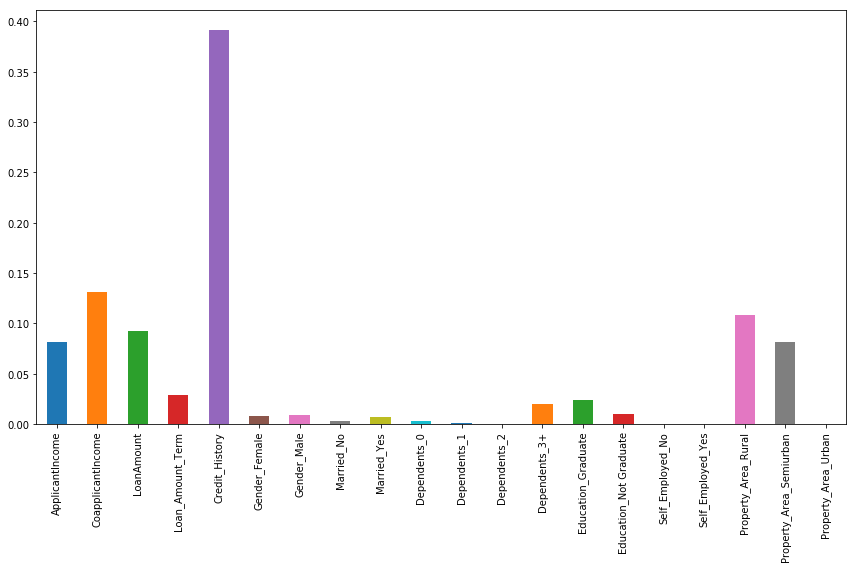

In [99]:
feature_significances = pd.Series(top_model.feature_importances_, index = X_trainV1.columns)
feature_significances.plot(kind = "bar", figsize = [12,8])
plt.tight_layout()

From this it's clear that there are 4-7 main predictor features (variables). We can consider these later on for our feature engineering so that the new engineered features are built off of the statistically significant ones.

In [129]:
"""
XGBoost
"""
from xgboost import XGBClassifier
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
max_depths = [3,5,10]
for k in range(2,8):
    for depth in max_depths:
        skf = StratifiedKFold(n_splits = k)
        for train_index, test_index in skf.split(X_trainV1, y_train):
            X_train_temp, X_test_temp = X_trainV1.loc[train_index], X_trainV1.loc[test_index]
            y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
            y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
            clf = XGBClassifier(max_depth = depth)
            clf.fit(X_train_temp, y_train_temp)
            train_accuracy = clf.score(X_train_temp, y_train_temp)
            test_accuracy = clf.score(X_test_temp, y_test_temp)
            if test_accuracy > maxAccuracy:
                maxAccuracy, trainAcc = test_accuracy, train_accuracy
            mean_test_Accuracy += test_accuracy
            count += 1
xgb_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.7809050928802345
Best testing Accuracy
training error: 0.8519924098671727
testing error: 0.8505747126436781


Finally, we can compare the mean accuracy each classifier had on the dataset

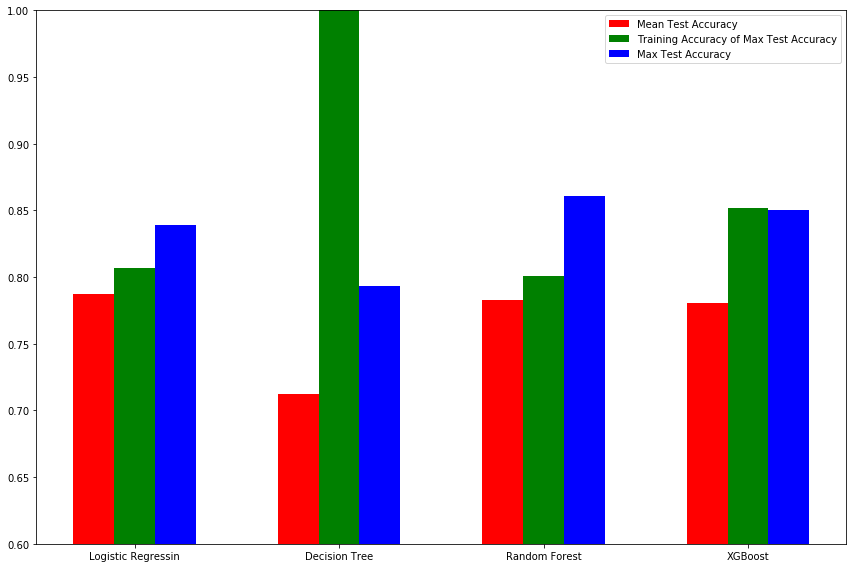

In [130]:
classifiers = ["Logistic Regressin", "Decision Tree", "Random Forest", "XGBoost"]
stats = [logit_stats,dt_stats,rf_stats,xgb_stats]
ind = np.arange(4)
fig, ax = plt.subplots(figsize = [12,8])
width = .2
p1 = ax.bar(ind, [i[0] for i in stats] , width, color='r')
p2 = ax.bar(ind + width, [i[1] for i in stats], width, color='g')
p3 = ax.bar(ind + 2*width, [i[2] for i in stats], width, color='b')
ax.set_xticks(ind+width)
ax.set_xticklabels(["Logistic Regressin", "Decision Tree", "Random Forest", "XGBoost"])
ax.legend((p1[0], p2[0], p3[0]), ("Mean Test Accuracy", "Training Accuracy of Max Test Accuracy", "Max Test Accuracy"))
ax.set_ylim((.6,1))
plt.tight_layout()

Now we begin our feature engineering. In order to optimize the performance of the above models, we'll modify our data in several ways. First, we can treat our outliers and skewed data by attempting to normalize the distribution through logging all of our data to relatively scale up lower values while simultaneously scaling down higher values (since our numerical data is right skewed, outliers are on the right hand side). We can also engineer new features

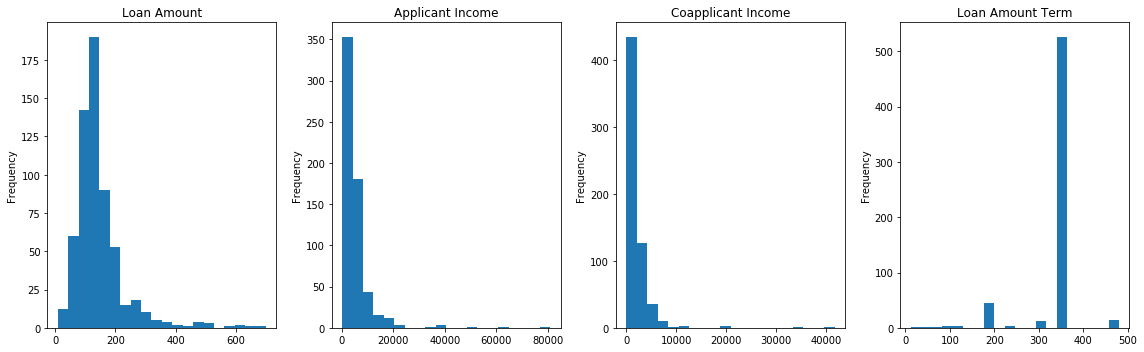

In [65]:
#Outlier Treatment
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize = [16,5])
plt.subplot(141)
X_train["LoanAmount"].plot.hist(bins=20, title = "Loan Amount")
plt.subplot(142)
X_train["ApplicantIncome"].plot.hist(bins = 20, title = "Applicant Income")
plt.subplot(143)
X_train["CoapplicantIncome"].plot.hist(bins = 20, title = "Coapplicant Income")
plt.subplot(144)
X_train["Loan_Amount_Term"].plot.hist(bins = 20, title = "Loan Amount Term")
plt.tight_layout()

So we will apply the log transformation to  the Loan Amount, ApplicantIncome, and Coapplicant Income data.

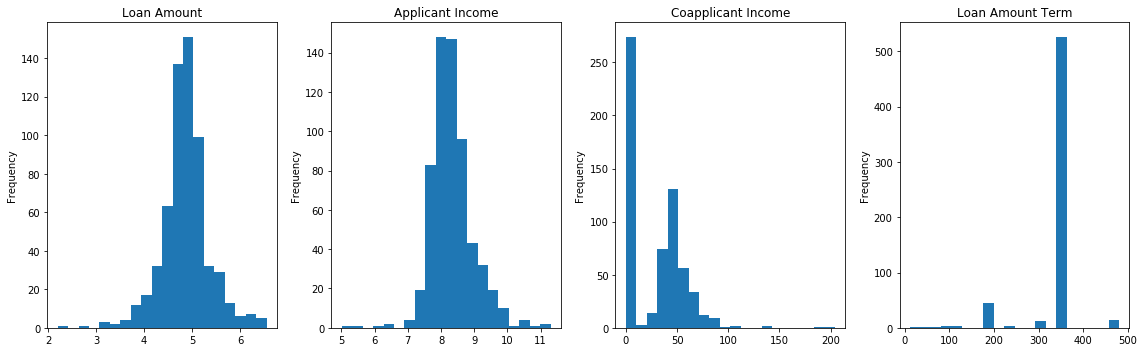

In [68]:
X_trainV2 = X_train.drop("Loan_Status", axis = 1)
X_trainV2["log_LoanAmount"] = X_train["LoanAmount"].apply(np.log)
X_trainV2["log_ApplicantIncome"] = X_train["ApplicantIncome"].apply(np.log)
#zero_removed = X_train.replace({"CoapplicantIncome" : {0:1}})
X_trainV2["log_CoapplicantIncome"] = X_train["CoapplicantIncome"].apply(np.sqrt)
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize = [16,5])
plt.subplot(141)
X_trainV2["log_LoanAmount"].plot.hist(bins=20, title = "Loan Amount")
plt.subplot(142)
X_trainV2["log_ApplicantIncome"].plot.hist(bins = 20, title = "Applicant Income")
plt.subplot(143)
X_trainV2["log_CoapplicantIncome"].plot.hist(bins = 20, title = "Coapplicant Income")
plt.subplot(144)
X_trainV2["Loan_Amount_Term"].plot.hist(bins = 20, title = "Loan Amount Term")
plt.tight_layout()

Now we'll design new features using a combination of previous observations, including the largest correlarion between variables from our covariance matrix and the most significant features determined from our random forest algorithm. These results told us that there was some positive correlation between loan amount and applicant income, and the most significant features being (in order) Credit History, Applicant Income, Loan Amount, Coapplicant Income, and Loan Amount Term Length.

From this, we will create 4 new features:
LoanAmount * ApplicantIncome - Based off covariance matrix
ApplicantIncome + CoapplicantIncome - Total Income
LoanAmount / Loan_Amount_Term - Get an idea of how much money per day is required (mpd)


In [70]:
X_trainV2["AmountxIncome"] = X_trainV2.log_LoanAmount * X_trainV2.log_ApplicantIncome
X_trainV2["Total_Income"] = X_trainV2.log_ApplicantIncome + X_trainV2.log_CoapplicantIncome
X_trainV2["MPD"] = X_trainV2.log_LoanAmount / X_trainV2.Loan_Amount_Term


In [140]:
"""
Logisitic Regression

We perform grid search in order to final the optimal combination of hyperparameters.

"""
from sklearn.preprocessing import StandardScaler
X_trainV2 = pd.get_dummies(X_trainV2)
C_vals = [.0001, .05, .1, .25, .5, 1, 1.5, 3]
norms = ["11", "l2"]
scores = {}
mean_test_Accuracy = count = 0
for k in range(2,8):
    for C_val in C_vals:
        for norm in norms:
            skf = StratifiedKFold(n_splits = k)
            for train_index, test_index in skf.split(X_trainV1, y_train):
                scaler = StandardScaler()
                X_train_temp, X_test_temp = scaler.fit_transform(X_trainV2.loc[train_index]), scaler.fit_transform(X_trainV2.loc[test_index])
                y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
                y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
                clf = LogisticRegression(random_state=1, C=C_val)
                clf.fit(X_train_temp, y_train_temp)
                train_Accuracy = clf.score(X_train_temp, y_train_temp)
                test_Accuracy = clf.score(X_test_temp, y_test_temp)
                pairing = "{}, {}, {}".format(k, C_val, norm)
                scores[pairing] = [train_Accuracy, test_Accuracy]
                count +=1
                mean_test_Accuracy += test_Accuracy
best_train_params = max(scores.keys(), key= lambda k: scores[k][0])
best_test_params = max(scores.keys(), key= lambda k: scores[k][1])
k1, C1, p1 = best_train_params.split(", ")
k2, C2, p2 = best_test_params.split(", ")
logit_stats = [mean_test_Accuracy / count, scores[best_test_params][0], scores[best_test_params][1]]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("minimum training error parameters:  k = {}, C = {}, penalty = {}".format(k1, C1, p1))
print("training accuracy: " + str(scores[best_train_params][0]))
print("testing accuracy: " + str(scores[best_train_params][1]))
print("minimum test error parameters:  k = {}, C = {}, penalty = {}".format(k2, C2, p2))
print("training accuracy: " + str(scores[best_test_params][0]))
print("testing accuracy: " + str(scores[best_test_params][1]))

Mean test Accuracy: 0.801833219894643
minimum training error parameters:  k = 5, C = 0.25, penalty = 11
training accuracy: 0.8150406504065041
testing accuracy: 0.819672131147541
minimum test error parameters:  k = 7, C = 0.05, penalty = 11
training accuracy: 0.8045540796963947
testing accuracy: 0.8390804597701149


In [132]:
"""
Decision Tree

We perform grid search as before.
"""
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
for k in range(2,8):
    skf = StratifiedKFold(n_splits = k)
    for train_index, test_index in skf.split(X_trainV1, y_train):
        X_train_temp, X_test_temp = X_trainV2.loc[train_index], X_trainV2.loc[test_index]
        y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
        y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
        clf = DecisionTreeClassifier()
        clf.fit(X_train_temp, y_train_temp)
        train_accuracy = clf.score(X_train_temp, y_train_temp)
        test_accuracy = clf.score(X_test_temp, y_test_temp)
        if test_accuracy > maxAccuracy:
            maxAccuracy, trainAcc = test_accuracy, train_accuracy
        mean_test_Accuracy += test_accuracy
        count += 1
dt_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.7161741630893821
Best testing Accuracy
training error: 1.0
testing error: 0.7843137254901961


In [133]:
"""
RandomForest
Note that we only use max_depth as a hyperparameter to tune and not n_estimators as is often used in conjunction
with max_depth. In general I have found that with randomforest, overfitting isn't generally a problem and the default
value of 100 trees suffices in most cases.
"""
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
max_depths = [None,3,5,10]
top_model = None
for k in range(2,8):
    for depth in max_depths:
        skf = StratifiedKFold(n_splits = k)
        for train_index, test_index in skf.split(X_trainV1, y_train):
            X_train_temp, X_test_temp = X_trainV2.loc[train_index], X_trainV2.loc[test_index]
            y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
            y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
            clf = RandomForestClassifier(max_depth = depth)
            clf.fit(X_train_temp, y_train_temp)
            train_accuracy = clf.score(X_train_temp, y_train_temp)
            test_accuracy = clf.score(X_test_temp, y_test_temp)
            if test_accuracy > maxAccuracy:
                maxAccuracy, trainAcc = test_accuracy, train_accuracy
                top_model = clf
            mean_test_Accuracy += test_accuracy
            count += 1
rf_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.780007621004251
Best testing Accuracy
training error: 0.9411764705882353
testing error: 0.8735632183908046


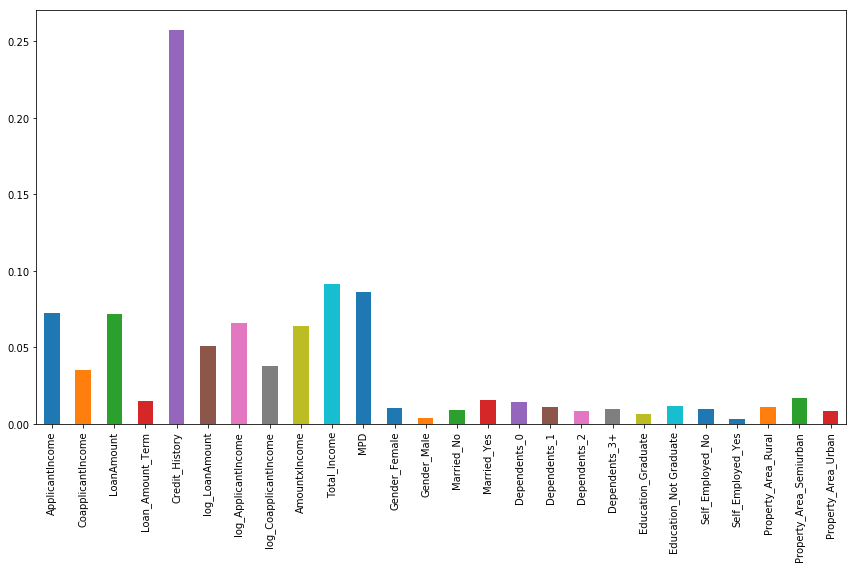

In [137]:
feature_significances = pd.Series(top_model.feature_importances_, index = X_trainV2.columns)
feature_significances.plot(kind = "bar", figsize = [12,8])
plt.tight_layout()

It looks like all of our engineered features were successful with respect to their significance to the model.

In [134]:
"""
XGBoost
"""
maxAccuracy = trainAcc = 0
mean_test_Accuracy = count = 0
max_depths = [3,5,10]
for k in range(2,8):
    for depth in max_depths:
        skf = StratifiedKFold(n_splits = k)
        for train_index, test_index in skf.split(X_trainV1, y_train):
            X_train_temp, X_test_temp = X_trainV2.loc[train_index], X_trainV2.loc[test_index]
            y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]
            y_train_temp, y_test_temp = np.where(y_train_temp == "Y", 1, 0), np.where(y_test_temp == "Y", 1, 0)
            clf = XGBClassifier(max_depth = depth)
            clf.fit(X_train_temp, y_train_temp)
            train_accuracy = clf.score(X_train_temp, y_train_temp)
            test_accuracy = clf.score(X_test_temp, y_test_temp)
            if test_accuracy > maxAccuracy:
                maxAccuracy, trainAcc = test_accuracy, train_accuracy
            mean_test_Accuracy += test_accuracy
            count += 1
xgb_stats = [mean_test_Accuracy / count, trainAcc, maxAccuracy]
print("Mean test Accuracy: {}".format(mean_test_Accuracy / count))
print("Best testing Accuracy")
print("training error: " + str(trainAcc))
print("testing error: " + str(maxAccuracy))

Mean test Accuracy: 0.7799879762126881
Best testing Accuracy
training error: 0.9601518026565465
testing error: 0.8390804597701149


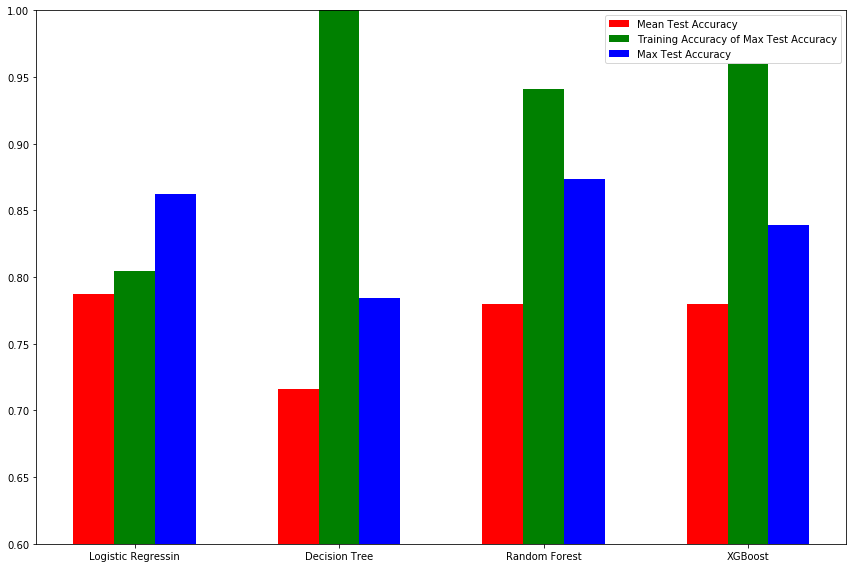

In [135]:
classifiers = ["Logistic Regressin", "Decision Tree", "Random Forest", "XGBoost"]
stats2 = [logit_stats,dt_stats,rf_stats,xgb_stats]
ind = np.arange(4)
fig, ax = plt.subplots(figsize = [12,8])
width = .2
p1 = ax.bar(ind, [i[0] for i in stats2] , width, color='r')
p2 = ax.bar(ind + width, [i[1] for i in stats2], width, color='g')
p3 = ax.bar(ind + 2*width, [i[2] for i in stats2], width, color='b')
ax.set_xticks(ind+width)
ax.set_xticklabels(["Logistic Regressin", "Decision Tree", "Random Forest", "XGBoost"])
ax.legend((p1[0], p2[0], p3[0]), ("Mean Test Accuracy", "Training Accuracy of Max Test Accuracy", "Max Test Accuracy"))
ax.set_ylim((.6,1))
plt.tight_layout()

In [136]:
#Residuals
mean_residuals = [stats2[i][0] - stats[i][0] for i in range(len(stats))]
train_residuals = [stats2[i][1] - stats[i][1] for i in range(len(stats))]
test_residuals = [stats2[i][2] - stats[i][2] for i in range(len(stats))]
print(mean_residuals)
print(train_residuals)
print(test_residuals)


[-7.595288304207415e-05, 0.003857124780201726, -0.0031749009652639604, -0.0009171166675463471]
[-0.001897533206831059, 0.0, 0.140363462458154, 0.10815939278937381]
[0.02298850574712641, -0.008789722785666032, 0.012907480685886652, -0.011494252873563204]
